In [43]:
import random
import itertools
from numpy.random import rand
import time

def cTFT(round,P1State,P2State):
    if round==0:
        P1State[round]="c"
    else:
        P1State[round]=P2State[round-1]
    return P1State
def dTFT(round,P1State,P2State):
    if round==0:
        P1State[round]="d"
    else:
        P1State[round]=P2State[round-1]
    return P1State
def TF2T(round,P1State,P2State):
    if round<2:
        P1State[round]="c"
    elif P2State[round-1]=="d" and P2State[round-2]=="d":
        P1State[round]="d"
    else:
        P1State[round]="c"
    return P1State
def T2FT(round,P1State,P2State):
    if round<2:
        P1State[round]="c"
    elif P2State[round-1]=="d" or P2State[round-2]=="d":
        P1State[round]="d"
    else:
        P1State[round]="c"
    return P1State
def GRIM(round,P1State,P2State):
    if "d" in P2State or "d" in P1State:
        P1State[round]="d"
    else:
        P1State[round]="c"
    return P1State
def GRADUAL(round,P1State,P2State):
    indicesD = [i for i, x in enumerate(P2State) if x == "d"]
    nDef2=len(indicesD)
    if round==0:
        P1State[round]="c"
    else:
        nDef1=0
        for j in range(nDef2):
            if P1State[round-j-1]=="d":
                nDef1=nDef1+1  
        if nDef2>nDef1:
            P1State[round]="d"
        else:
            P1State[round]="c"
    return P1State
def softMAJ(round,P1State,P2State):
    indicesD = [i for i, x in enumerate(P2State) if x == "d"]
    nDef2=len(indicesD)
    if round==0:
        P1State[round]="c"
    elif 2*nDef2<=round:
        P1State[round]="c"
    else:
        P1State[round]="d"        
    return P1State
def hardMAJ(round,P1State,P2State):
    indicesD = [i for i, x in enumerate(P2State) if x == "d"]
    nDef2=len(indicesD)
    if round==0:
        P1State[round]="d"
    elif 2*nDef2<round:
        P1State[round]="c"
    else:
        P1State[round]="d"       
    return P1State
def PROBER(round,P1State,P2State):
    if round==0:
        P1State[round]="d"
    elif round==1:
        P1State[round]="c"
    elif round==2:
        P1State[round]="c" 
    elif P2State[1]=="c" and P2State[2]=="c":
        P1State[round]="d"
    else:
        P1State[round]=P2State[round-1]
    return P1State
def GTFT(round,P1State,P2State):
    cost = 1
    benefit = 2
    if round==0:
        P1State[round]="c"
    elif P1State[round-1]=="c" and P2State[round-1]=="c":
        P1State[round]="c"
    elif P1State[round-1]=="d" and P2State[round-1]=="c":
        P1State[round]="c"
    elif P1State[round-1]=="c" and P2State[round-1]=="d":
        if random.random()<1-cost/benefit:
            P1State[round]="c"
        else:
            P1State[round]="d"
    elif P1State[round-1]=="d" and P2State[round-1]=="d":
        if random.random()<1-cost/benefit:
            P1State[round]="c"
        else:
            P1State[round]="d"
    return P1State
def dWSLS(round,P1State,P2State):
    if round==0:
        P1State[round]="d"
    elif P1State[round-1]=="c" and P2State[round-1]=="c":
        P1State[round]="c"
    elif P1State[round-1]=="d" and P2State[round-1]=="c":
        P1State[round]="d"
    elif P1State[round-1]=="c" and P2State[round-1]=="d":
        P1State[round]="d"
    elif P1State[round-1]=="d" and P2State[round-1]=="d":
        P1State[round]="c"
    return P1State
def cWSLS(round,P1State,P2State):
    if round==0:
        P1State[round]="c"
    elif P1State[round-1]=="c" and P2State[round-1]=="c":
        P1State[round]="c"
    elif P1State[round-1]=="d" and P2State[round-1]=="c":
        P1State[round]="d"
    elif P1State[round-1]=="c" and P2State[round-1]=="d":
        P1State[round]="d"
    elif P1State[round-1]=="d" and P2State[round-1]=="d":
        P1State[round]="c"
    return P1State
def ALLD(round,P1State,P2State):
    P1State[round]="d"
    return P1State
def ALLC(round,P1State,P2State):
    P1State[round]="c"
    return P1State
def RANDOM(round,P1State,P2State):
    if rand()<0.5:
        P1State[round]="c"
    else:
        P1State[round]="d"
    return P1State
def extort(round,P1State,P2State):
    p_dict = {('c', 'c') : 8/9, ('c', 'd') : 1/2, ('d', 'c') : 1/3, ('d', 'd') : 0}
    if round == 0 : 
        P1State[round]="c"
    elif random.random() < p_dict[(P1State[round-1], P2State[round-1])]:
        P1State[round]="c"
    else:
        P1State[round]="d"
    return P1State
def Game(Strat1,Strat2,LRounds, verbose=False) -> tuple[float,float,int,int]:
    benefit = 2
    cost = 1
    P1State=[None]*LRounds
    P2State=[None]*LRounds
    vP1State=[None]*LRounds
    Payoff1=0
    Payoff2=0

    TrueRecordP1, TrueRecordP2 = [], []

    for i in range(LRounds):
        Strat1(i,P1State,P2State)
        
        if i>0:
            vP1State[0:i]=P1State[0:i]           
        
        Strat2(i,P2State,vP1State)
        
        if P1State[i]=="c":
            Payoff1=Payoff1-cost
            Payoff2=Payoff2+benefit
            
        if P2State[i]=="c":
            Payoff2=Payoff2-cost
            Payoff1=Payoff1+benefit
            
        TrueRecordP1.append(P1State[i])
        TrueRecordP2.append(P2State[i])

    if Payoff1>Payoff2:
        Win1=1
        Win2=0
    elif Payoff2>Payoff1:
        Win1=0
        Win2=1
    else:
        Win1=0
        Win2=0
    
    if verbose:
        print('P1State : ', TrueRecordP1)
        print('P2State : ', TrueRecordP2)

    return Payoff1/LRounds,Payoff2/LRounds,Win1,Win2
def QuickGamePlays(Strat1,Strat2,LRounds) -> tuple[float,float,int,int]:
    P1State, P2State = [None]*LRounds, [None]*LRounds
    for i in range(LRounds):
        P1Statecopy, P2Statecopy = P1State.copy(), P2State.copy()
        P1State[i] = Strat1(i,P1Statecopy,P2Statecopy)[i]
        P2State[i] = Strat2(i,P2Statecopy,P1Statecopy)[i]
    return P1State, P2State

def ForgivingSoftMAJ(nthround,P1State,P2State):
    if nthround == 27:
        nc2 = 2*P2State.count("c")
        if nc2 >= P1State.count("c") and nc2 >= nthround - 1:
            P1State[nthround] = "c"
            return P1State

    P1State[nthround] = softMAJ(nthround,P1State,P2State)[nthround]
    return P1State

def RATIO(nthround,P1State,P2State):
    nd = P2State.count("d") # no. of defects
    nc = nthround - nd      # no. of cooperations
    if nd == 0:
        P1State[nthround]="c"
    elif nc/nd > 0.925:
        P1State[nthround]="c"
    else:
        P1State[nthround]="d"
    return P1State

def ScoreTeamNc(defaultStrat = RATIO, lenCodeP = 8, lenCodeR = 8, SuperSecretCodes='random'):
    # SuperSecretCodes[0] = code for ScoreRunner, SuperSecretCodes[1] = code for ScorePaceMaker
    if SuperSecretCodes == 'random':
        SuperSecretCodes = [list(random.choice(list(itertools.product(['c','d'],repeat=lenCodeR)))), list(random.choice(list(itertools.product(['c','d'],repeat=lenCodeP))))]
        # print("SuperSecretCodes: ",SuperSecretCodes)
    
    PaceMakerMoves = SuperSecretCodes[1] + ['c']*(200 - lenCodeP)
    RunnerMoves = QuickGamePlays(defaultStrat, (lambda a, b, c : PaceMakerMoves), lenCodeP)[0] + SuperSecretCodes[0] + ['d']*(200 - lenCodeP - lenCodeR)

    def ScoreRunner8plus(nthround,P1State,P2State):
        # Is the opponent a ScorePaceMaker?
        if P2State[:max(lenCodeP, nthround)] == PaceMakerMoves[:max(lenCodeP, nthround)]:
            P1State[nthround] = RunnerMoves[nthround]
            return P1State
        
        if 199 - nthround < 3:
            P1State[nthround] = 'd'
            return P1State

        # Otherwise, play RATIO
        P1State[nthround] = defaultStrat(nthround,P1State,P2State)[nthround]

        return P1State

    def ScorePaceMaker8plus(nthround,P1State,P2State):
        # Is the opponent a ScoreRunner?
        if P2State[:nthround] == RunnerMoves[:nthround]:
            P1State[nthround] = PaceMakerMoves[nthround]
            return P1State
        
        # Otherwise, play ALLD
        P1State[nthround]="d"
        return P1State
    
    return ScoreRunner8plus, ScorePaceMaker8plus

def ScoreTeamNd(defaultStrat = RATIO, lenCodeP = 8, lenCodeR = 8, SuperSecretCodes='random'):
    # SuperSecretCodes[0] = code for ScoreRunner, SuperSecretCodes[1] = code for ScorePaceMaker
    if SuperSecretCodes == 'random':
        SuperSecretCodes = [list(random.choice(list(itertools.product(['c','d'],repeat=lenCodeR)))), list(random.choice(list(itertools.product(['c','d'],repeat=lenCodeP))))]
        # print("SuperSecretCodes: ",SuperSecretCodes)
    
    PaceMakerMoves = SuperSecretCodes[1] + ['d'] * lenCodeR + ['c']*(200 - lenCodeP - lenCodeR)
    RunnerMoves = QuickGamePlays(defaultStrat, (lambda a, b, c : PaceMakerMoves), lenCodeP)[0] + SuperSecretCodes[0] + ['d']*(200 - lenCodeP - lenCodeR)

    def ScoreRunner8plus(nthround,P1State,P2State):
        # Is the opponent a ScorePaceMaker?
        if P2State[:max(lenCodeP, nthround)] == PaceMakerMoves[:max(lenCodeP, nthround)]:
            P1State[nthround] = RunnerMoves[nthround]
            return P1State
        
        if 199 - nthround < 3:
            P1State[nthround] = 'd'
            return P1State

        # Otherwise, play RATIO
        P1State[nthround] = defaultStrat(nthround,P1State,P2State)[nthround]

        return P1State

    def ScorePaceMaker8plus(nthround,P1State,P2State):
        # Is the opponent a ScoreRunner?
        if P2State[:nthround] == RunnerMoves[:nthround]:
            P1State[nthround] = PaceMakerMoves[nthround]
            return P1State
        
        # Otherwise, play ALLD
        P1State[nthround]="d"
        return P1State
    
    return ScoreRunner8plus, ScorePaceMaker8plus

In [52]:
StratList = [cTFT,dTFT,TF2T,T2FT,GRIM,GRADUAL,softMAJ,hardMAJ,PROBER,GTFT,cWSLS,dWSLS,ALLC,ALLD,RANDOM,extort]

LenCodeSpace = range(2, 9)
repeat = 500
result = []

for lenCodeP_ in LenCodeSpace:
    resultP = []
    for lenCodeR_ in LenCodeSpace:
        TotalScore = 0
        t = time.perf_counter()
        for _ in range(repeat):
            R, P = ScoreTeamNc(lenCodeR=lenCodeR_, lenCodeP=lenCodeP_)
            ScoreTeamList = [R] + [P]*7
            for opponent in StratList + ScoreTeamList:
                TotalScore += Game(R, opponent, 200)[0]
        avg = TotalScore/(repeat*len(StratList))
        resultP.append(avg)
        print(f'lenCodeP: {lenCodeP_}, lenCodeR: {lenCodeR_}, Average Score: {avg}, Time taken: {time.perf_counter() - t}')
    result.append(resultP)


lenCodeP: 0, lenCodeR: 0, Average Score: 1.4051212499999872, Time taken: 10.894954699993832
lenCodeP: 0, lenCodeR: 1, Average Score: 1.5299625000000363, Time taken: 11.169043700007023
lenCodeP: 0, lenCodeR: 2, Average Score: 1.5481593750000398, Time taken: 11.035684900009073
lenCodeP: 0, lenCodeR: 3, Average Score: 1.582251875000013, Time taken: 11.244557600002736
lenCodeP: 0, lenCodeR: 4, Average Score: 1.5778399999999915, Time taken: 11.326284199996735
lenCodeP: 0, lenCodeR: 5, Average Score: 1.57303749999999, Time taken: 11.150295300001744
lenCodeP: 0, lenCodeR: 6, Average Score: 1.5773881249999913, Time taken: 11.21115909999935
lenCodeP: 0, lenCodeR: 7, Average Score: 1.5917312499999905, Time taken: 10.966400499994052
lenCodeP: 0, lenCodeR: 8, Average Score: 1.5798099999999857, Time taken: 11.112724199992954
lenCodeP: 0, lenCodeR: 9, Average Score: 1.5750424999999861, Time taken: 11.192555600006017
lenCodeP: 0, lenCodeR: 10, Average Score: 1.5775599999999834, Time taken: 11.2566062

KeyboardInterrupt: 

TypeError: Invalid shape (0,) for image data

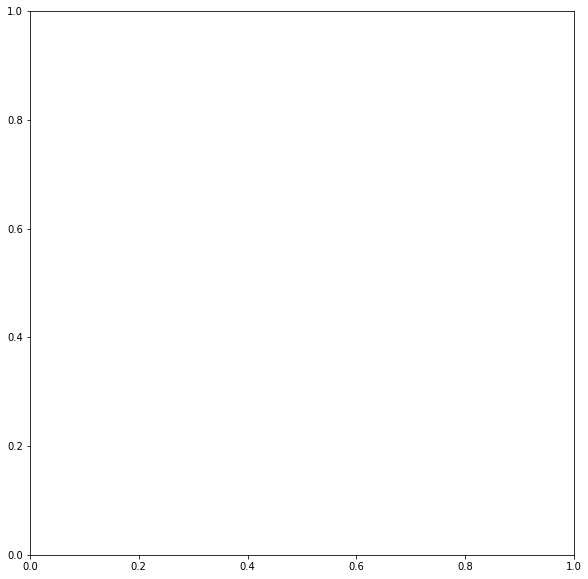

In [81]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm


plt.figure(figsize=(10,10))
plt.imshow(result[2:], cmap='hot')
plt.colorbar()
plt.xticks(range(len(LenCodeSpace)), LenCodeSpace)
plt.yticks(range(len(LenCodeSpace)), LenCodeSpace)
plt.xlabel('Runner Code Length')
plt.ylabel('Pacemaker Code Length')
plt.title('Average Score of ScoreTeamN')
plt.show()

In [26]:
'''
lenCodeP: 4, lenCodeR: 4, Average Score: 1.7607593749999888, Time taken: 8.26983950000431
lenCodeP: 4, lenCodeR: 5, Average Score: 1.757046093749999, Time taken: 8.263185199997679
lenCodeP: 4, lenCodeR: 6, Average Score: 1.7574687499999921, Time taken: 8.247927899996284
lenCodeP: 4, lenCodeR: 7, Average Score: 1.7545421875000002, Time taken: 8.33079859999998
lenCodeP: 4, lenCodeR: 8, Average Score: 1.7538882812499923, Time taken: 8.373698999996122
lenCodeP: 4, lenCodeR: 9, Average Score: 1.7524250000000066, Time taken: 8.43070710000029
lenCodeP: 4, lenCodeR: 10, Average Score: 1.7523289062500182, Time taken: 8.447401100005663
lenCodeP: 4, lenCodeR: 11, Average Score: 1.7467445312500294, Time taken: 8.385266400000546
lenCodeP: 4, lenCodeR: 12, Average Score: 1.7507257812500234, Time taken: 8.451056900004914
lenCodeP: 5, lenCodeR: 4, Average Score: 1.757308593750001, Time taken: 8.338567800004967
lenCodeP: 5, lenCodeR: 5, Average Score: 1.757228906250012, Time taken: 8.296683699998539
lenCodeP: 5, lenCodeR: 6, Average Score: 1.755893750000016, Time taken: 8.358073499999591
lenCodeP: 5, lenCodeR: 7, Average Score: 1.7550843750000058, Time taken: 8.342064900003606
lenCodeP: 5, lenCodeR: 8, Average Score: 1.7568226562500273, Time taken: 8.33850810000149
lenCodeP: 5, lenCodeR: 9, Average Score: 1.7532742187500225, Time taken: 8.355444100001478
lenCodeP: 5, lenCodeR: 10, Average Score: 1.7514296875000301, Time taken: 8.374187900000834
lenCodeP: 5, lenCodeR: 11, Average Score: 1.750862500000021, Time taken: 8.447891700001492
lenCodeP: 5, lenCodeR: 12, Average Score: 1.7506281250000282, Time taken: 8.488719900000433
lenCodeP: 6, lenCodeR: 4, Average Score: 1.7547843750000354, Time taken: 8.341297500002838
lenCodeP: 6, lenCodeR: 5, Average Score: 1.7545820312500233, Time taken: 8.303533800004516
lenCodeP: 6, lenCodeR: 6, Average Score: 1.7529453125000174, Time taken: 8.419290599995293
lenCodeP: 6, lenCodeR: 7, Average Score: 1.753497656250023, Time taken: 8.401287499997125
lenCodeP: 6, lenCodeR: 8, Average Score: 1.7499406250000344, Time taken: 8.322772700004862
lenCodeP: 6, lenCodeR: 9, Average Score: 1.7516578125000246, Time taken: 8.413101500002085
lenCodeP: 6, lenCodeR: 10, Average Score: 1.7497632812500388, Time taken: 8.464072199996735
lenCodeP: 6, lenCodeR: 11, Average Score: 1.7461960937500351, Time taken: 8.43712239999877
lenCodeP: 6, lenCodeR: 12, Average Score: 1.749794531250046, Time taken: 8.512179500001366
lenCodeP: 7, lenCodeR: 4, Average Score: 1.752810937500028, Time taken: 8.383142300001055
lenCodeP: 7, lenCodeR: 5, Average Score: 1.754096875000018, Time taken: 8.369258300001093
lenCodeP: 7, lenCodeR: 6, Average Score: 1.751414843750026, Time taken: 8.380126799995196
lenCodeP: 7, lenCodeR: 7, Average Score: 1.7517656250000448, Time taken: 8.477336099997046
lenCodeP: 7, lenCodeR: 8, Average Score: 1.7497023437500387, Time taken: 8.379471199994441
lenCodeP: 7, lenCodeR: 9, Average Score: 1.7478367187500468, Time taken: 8.426430300001812
lenCodeP: 7, lenCodeR: 10, Average Score: 1.748969531250031, Time taken: 8.492171300000336
lenCodeP: 7, lenCodeR: 11, Average Score: 1.7473140625000338, Time taken: 8.486745299996983
lenCodeP: 7, lenCodeR: 12, Average Score: 1.7456781250000293, Time taken: 8.589201100003265
lenCodeP: 8, lenCodeR: 4, Average Score: 1.7504546875000369, Time taken: 8.392331600000034
lenCodeP: 8, lenCodeR: 5, Average Score: 1.7502320312500348, Time taken: 8.415974099996674
lenCodeP: 8, lenCodeR: 6, Average Score: 1.746310156250037, Time taken: 8.394709699998202
lenCodeP: 8, lenCodeR: 7, Average Score: 1.7487882812500306, Time taken: 8.463564600002428
lenCodeP: 8, lenCodeR: 8, Average Score: 1.7468531250000472, Time taken: 8.52688720000151
lenCodeP: 8, lenCodeR: 9, Average Score: 1.7453632812500297, Time taken: 8.593873599995277
lenCodeP: 8, lenCodeR: 10, Average Score: 1.7427125000000303, Time taken: 8.726236699993024
lenCodeP: 8, lenCodeR: 11, Average Score: 1.7419281250000347, Time taken: 8.58318710000458
lenCodeP: 8, lenCodeR: 12, Average Score: 1.7433156250000315, Time taken: 8.674151899998833
lenCodeP: 9, lenCodeR: 4, Average Score: 1.7465023437500338, Time taken: 8.45541349999985
lenCodeP: 9, lenCodeR: 5, Average Score: 1.7476523437500322, Time taken: 8.514191200003552
lenCodeP: 9, lenCodeR: 6, Average Score: 1.7466281250000357, Time taken: 8.400763999998162
lenCodeP: 9, lenCodeR: 7, Average Score: 1.7450625000000293, Time taken: 8.418426600001112
lenCodeP: 9, lenCodeR: 8, Average Score: 1.7428125000000336, Time taken: 8.503683200004161
lenCodeP: 9, lenCodeR: 9, Average Score: 1.7427195312500303, Time taken: 8.437825000000885
lenCodeP: 9, lenCodeR: 10, Average Score: 1.7425164062500331, Time taken: 8.491301599999133
lenCodeP: 9, lenCodeR: 11, Average Score: 1.7403773437500416, Time taken: 8.505437599997094
lenCodeP: 9, lenCodeR: 12, Average Score: 1.7416671875000496, Time taken: 8.787626199999067
lenCodeP: 10, lenCodeR: 4, Average Score: 1.7446679687500353, Time taken: 8.41021770000225
lenCodeP: 10, lenCodeR: 5, Average Score: 1.7434500000000304, Time taken: 8.470619100000476
lenCodeP: 10, lenCodeR: 6, Average Score: 1.7436687500000334, Time taken: 8.502192700005253
lenCodeP: 10, lenCodeR: 7, Average Score: 1.7413890625000292, Time taken: 8.511833900003694
lenCodeP: 10, lenCodeR: 8, Average Score: 1.739392187500028, Time taken: 8.525297899999714
lenCodeP: 10, lenCodeR: 9, Average Score: 1.7397476562500325, Time taken: 8.586858599999687
lenCodeP: 10, lenCodeR: 10, Average Score: 1.7388578125000311, Time taken: 8.52960560000065
lenCodeP: 10, lenCodeR: 11, Average Score: 1.7382210937500198, Time taken: 8.574639799997385
lenCodeP: 10, lenCodeR: 12, Average Score: 1.737349218750034, Time taken: 8.707292099999904
lenCodeP: 11, lenCodeR: 4, Average Score: 1.739926562500023, Time taken: 8.57034470000508
lenCodeP: 11, lenCodeR: 5, Average Score: 1.739418750000034, Time taken: 8.591121000004932
lenCodeP: 11, lenCodeR: 6, Average Score: 1.7393093750000193, Time taken: 8.552460600003542
lenCodeP: 11, lenCodeR: 7, Average Score: 1.7382546875000293, Time taken: 8.568245400005253
lenCodeP: 11, lenCodeR: 8, Average Score: 1.7370562500000404, Time taken: 8.56560460000037
lenCodeP: 11, lenCodeR: 9, Average Score: 1.7352078125000339, Time taken: 8.622080600005575
lenCodeP: 11, lenCodeR: 10, Average Score: 1.7353945312500199, Time taken: 8.592107600001327
lenCodeP: 11, lenCodeR: 11, Average Score: 1.7331992187500154, Time taken: 8.748207299999194
lenCodeP: 11, lenCodeR: 12, Average Score: 1.732742968750028, Time taken: 8.749942800001008
lenCodeP: 12, lenCodeR: 4, Average Score: 1.7393828125000181, Time taken: 8.838392900004692
lenCodeP: 12, lenCodeR: 5, Average Score: 1.736739843750046, Time taken: 8.675336799999059
lenCodeP: 12, lenCodeR: 6, Average Score: 1.7354304687500377, Time taken: 8.824956999997084
lenCodeP: 12, lenCodeR: 7, Average Score: 1.7351109375000218, Time taken: 8.831538800004637
lenCodeP: 12, lenCodeR: 8, Average Score: 1.734265625000019, Time taken: 8.936946599998919
lenCodeP: 12, lenCodeR: 9, Average Score: 1.7332382812500202, Time taken: 8.982127000002947
lenCodeP: 12, lenCodeR: 10, Average Score: 1.7283687500000176, Time taken: 8.83640529999684
lenCodeP: 12, lenCodeR: 11, Average Score: 1.7301992187500093, Time taken: 8.86380939999799
lenCodeP: 12, lenCodeR: 12, Average Score: 1.7306929687500208, Time taken: 9.022191599993675
'''

'\nlenCodeP: 4, lenCodeR: 4, Average Score: 1.7607593749999888, Time taken: 8.26983950000431\nlenCodeP: 4, lenCodeR: 5, Average Score: 1.757046093749999, Time taken: 8.263185199997679\nlenCodeP: 4, lenCodeR: 6, Average Score: 1.7574687499999921, Time taken: 8.247927899996284\nlenCodeP: 4, lenCodeR: 7, Average Score: 1.7545421875000002, Time taken: 8.33079859999998\nlenCodeP: 4, lenCodeR: 8, Average Score: 1.7538882812499923, Time taken: 8.373698999996122\nlenCodeP: 4, lenCodeR: 9, Average Score: 1.7524250000000066, Time taken: 8.43070710000029\nlenCodeP: 4, lenCodeR: 10, Average Score: 1.7523289062500182, Time taken: 8.447401100005663\nlenCodeP: 4, lenCodeR: 11, Average Score: 1.7467445312500294, Time taken: 8.385266400000546\nlenCodeP: 4, lenCodeR: 12, Average Score: 1.7507257812500234, Time taken: 8.451056900004914\nlenCodeP: 5, lenCodeR: 4, Average Score: 1.757308593750001, Time taken: 8.338567800004967\nlenCodeP: 5, lenCodeR: 5, Average Score: 1.757228906250012, Time taken: 8.29668

In [38]:
StratList = [cTFT,dTFT,TF2T,T2FT,GRIM,GRADUAL,softMAJ,hardMAJ,PROBER,GTFT,cWSLS,dWSLS,ALLC,ALLD,RANDOM,extort]

LenCodeSpace = range(2, 9)
repeat = 500
resultFSM = []

for lenCodeP_ in LenCodeSpace:
    resultP = []
    for lenCodeR_ in LenCodeSpace:
        TotalScore = 0
        t = time.perf_counter()
        for _ in range(repeat):
            R, P = ScoreTeamNc(lenCodeR=lenCodeR_, lenCodeP=lenCodeP_)
            ScoreTeamList = [R] + [P]*7
            for opponent in StratList + ScoreTeamList:
                TotalScore += Game(R, opponent, 200)[0]
        avg = TotalScore/(repeat*len(StratList))
        resultP.append(avg)
        print(f'lenCodeP: {lenCodeP_}, lenCodeR: {lenCodeR_}, Average Score: {avg}, Time taken: {time.perf_counter() - t}')
    resultFSM.append(resultP)


lenCodeP: 3, lenCodeR: 3, Average Score: 1.7556400000000143, Time taken: 10.456489199998032
lenCodeP: 3, lenCodeR: 4, Average Score: 1.756368750000008, Time taken: 10.354039199999534
lenCodeP: 3, lenCodeR: 5, Average Score: 1.75780812500002, Time taken: 10.46136259999912
lenCodeP: 3, lenCodeR: 6, Average Score: 1.754060000000003, Time taken: 10.452028100000462
lenCodeP: 3, lenCodeR: 7, Average Score: 1.7540775000000184, Time taken: 10.477349000000686
lenCodeP: 3, lenCodeR: 8, Average Score: 1.7518906250000081, Time taken: 10.45462150000094
lenCodeP: 3, lenCodeR: 9, Average Score: 1.7465450000000209, Time taken: 10.46271490000072
lenCodeP: 3, lenCodeR: 10, Average Score: 1.7486662500000334, Time taken: 10.45363609999913
lenCodeP: 4, lenCodeR: 3, Average Score: 1.7570068750000063, Time taken: 10.394180000002962
lenCodeP: 4, lenCodeR: 4, Average Score: 1.7586968750000063, Time taken: 10.455546099998173
lenCodeP: 4, lenCodeR: 5, Average Score: 1.7538993750000231, Time taken: 10.41194530000

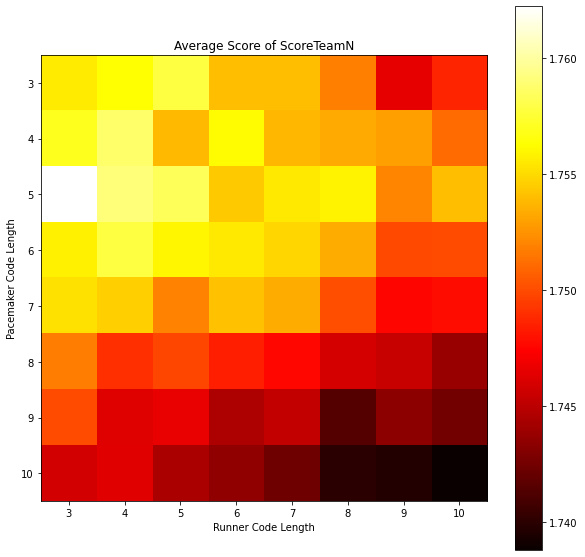

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.imshow(resultFSM, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(LenCodeSpace)), LenCodeSpace)
plt.yticks(range(len(LenCodeSpace)), LenCodeSpace)
plt.xlabel('Runner Code Length')
plt.ylabel('Pacemaker Code Length')
plt.title('Average Score of ScoreTeamN')
plt.show()

In [89]:
StratList = [cTFT,dTFT,TF2T,T2FT,GRIM,GRADUAL,softMAJ,hardMAJ,PROBER,GTFT,cWSLS,dWSLS,ALLC,ALLD,RANDOM,extort]

LenCodeSpace = range(2, 9)
repeat = 300
resultd = []

for lenCodeP_ in LenCodeSpace:
    resultP = []
    for lenCodeR_ in LenCodeSpace:
        TotalScore = 0
        t = time.perf_counter()
        for _ in range(repeat):
            R, P = ScoreTeamNd(lenCodeR=lenCodeR_, lenCodeP=lenCodeP_)
            ScoreTeamList = [R] + [P]*7
            for opponent in StratList + ScoreTeamList:
                TotalScore += Game(R, opponent, 200)[0]
        avg = TotalScore/(repeat)
        resultP.append(avg)
        print(f'lenCodeP: {lenCodeP_}, lenCodeR: {lenCodeR_}, Average Score: {avg}, Time taken: {time.perf_counter() - t}')
    resultd.append(resultP)

lenCodeP: 2, lenCodeR: 2, Average Score: 27.735833333333062, Time taken: 6.138191299993196
lenCodeP: 2, lenCodeR: 3, Average Score: 27.633049999999365, Time taken: 6.161302699998487
lenCodeP: 2, lenCodeR: 4, Average Score: 27.629883333333606, Time taken: 6.18437059999269
lenCodeP: 2, lenCodeR: 5, Average Score: 27.44543333333338, Time taken: 6.225414399988949
lenCodeP: 2, lenCodeR: 6, Average Score: 27.49704999999943, Time taken: 6.152196800001548
lenCodeP: 2, lenCodeR: 7, Average Score: 27.3871500000002, Time taken: 6.150048399998923
lenCodeP: 2, lenCodeR: 8, Average Score: 27.251333333333626, Time taken: 6.188171299989335
lenCodeP: 3, lenCodeR: 2, Average Score: 28.006483333332586, Time taken: 6.1776172999962
lenCodeP: 3, lenCodeR: 3, Average Score: 28.021249999999917, Time taken: 6.183580500000971
lenCodeP: 3, lenCodeR: 4, Average Score: 27.868483333333387, Time taken: 6.210522200010018
lenCodeP: 3, lenCodeR: 5, Average Score: 27.81574999999937, Time taken: 6.21542860000045
lenCodeP

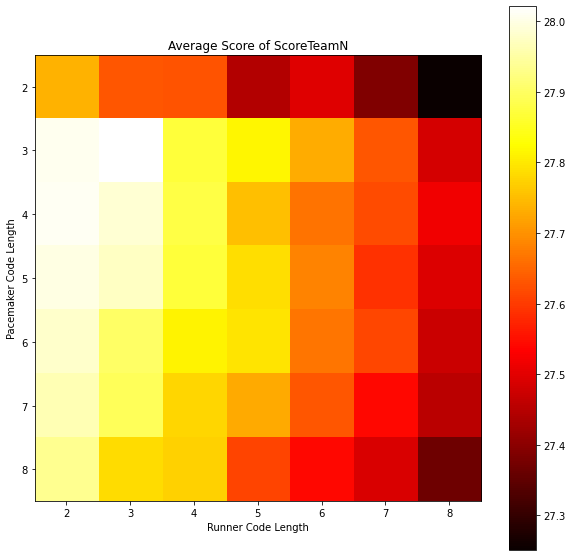

In [90]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.imshow(resultd, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(LenCodeSpace)), LenCodeSpace)
plt.yticks(range(len(LenCodeSpace)), LenCodeSpace)
plt.xlabel('Runner Code Length')
plt.ylabel('Pacemaker Code Length')
plt.title('Average Score of ScoreTeamN')
plt.show()

In [87]:
StratList = [cTFT,dTFT,TF2T,T2FT,GRIM,GRADUAL,softMAJ,hardMAJ,PROBER,GTFT,cWSLS,dWSLS,ALLC,ALLD,RANDOM,extort]

LenCodeSpace = range(2, 9)
repeat = 300
resultr = []

for lenCodeP_ in LenCodeSpace:
    resultP = []
    for lenCodeR_ in LenCodeSpace:
        TotalScore = 0
        t = time.perf_counter()
        for _ in range(repeat):
            R, P = ScoreTeamNc(lenCodeR=lenCodeR_, lenCodeP=lenCodeP_)
            TotalScore += Game(R, R, 200)[0] / 7
            for opponent in StratList + [P]:
                TotalScore += Game(R, opponent, 200)[0]
        avg = TotalScore/repeat
        resultP.append(avg)
        print(f'lenCodeP: {lenCodeP_}, lenCodeR: {lenCodeR_}, Average Score: {avg}, Time taken: {time.perf_counter() - t}')
    resultr.append(resultP)

lenCodeP: 2, lenCodeR: 2, Average Score: 15.120845238095098, Time taken: 5.332196899995324
lenCodeP: 2, lenCodeR: 3, Average Score: 15.23609047619022, Time taken: 5.333985999997822
lenCodeP: 2, lenCodeR: 4, Average Score: 15.079209523809364, Time taken: 5.378828599990811
lenCodeP: 2, lenCodeR: 5, Average Score: 15.107811904761718, Time taken: 5.316772399994079
lenCodeP: 2, lenCodeR: 6, Average Score: 15.201921428571211, Time taken: 5.399270800000522
lenCodeP: 2, lenCodeR: 7, Average Score: 15.150457142856954, Time taken: 5.401110199993127
lenCodeP: 2, lenCodeR: 8, Average Score: 15.210635714285527, Time taken: 5.36524690000806
lenCodeP: 3, lenCodeR: 2, Average Score: 15.496390476190218, Time taken: 5.428413500005263
lenCodeP: 3, lenCodeR: 3, Average Score: 15.479052380952144, Time taken: 5.418796800004202
lenCodeP: 3, lenCodeR: 4, Average Score: 15.39959761904735, Time taken: 5.3679142000037245
lenCodeP: 3, lenCodeR: 5, Average Score: 15.462464285714061, Time taken: 5.377734099994996
l

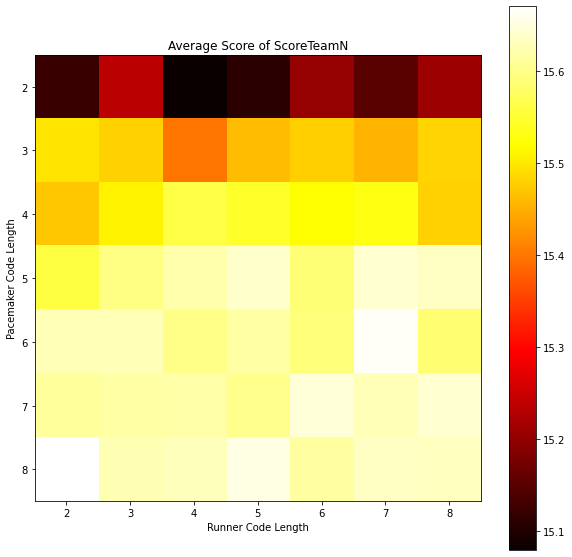

In [88]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.imshow(resultr, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(LenCodeSpace)), LenCodeSpace)
plt.yticks(range(len(LenCodeSpace)), LenCodeSpace)
plt.xlabel('Runner Code Length')
plt.ylabel('Pacemaker Code Length')
plt.title('Average Score of ScoreTeamN')
plt.show()

lenCodeP: 5, lenCodeR: 2, Average Score: 15.614178571428253, Time taken: 5.326622399996268
lenCodeP: 5, lenCodeR: 3, Average Score: 15.62804523809491, Time taken: 5.377501499999198
lenCodeP: 5, lenCodeR: 4, Average Score: 15.628116666666369, Time taken: 5.383797800008324
lenCodeP: 5, lenCodeR: 5, Average Score: 15.618788095237784, Time taken: 5.4024752999976045
lenCodeP: 5, lenCodeR: 6, Average Score: 15.60843809523781, Time taken: 5.650613800011342
lenCodeP: 5, lenCodeR: 7, Average Score: 15.580069047618748, Time taken: 5.522140899993246
lenCodeP: 5, lenCodeR: 8, Average Score: 15.599654761904452, Time taken: 5.537745800000266
lenCodeP: 5, lenCodeR: 9, Average Score: 15.588559523809245, Time taken: 5.498730599996634
lenCodeP: 5, lenCodeR: 10, Average Score: 15.594571428571143, Time taken: 5.452857099997345
lenCodeP: 5, lenCodeR: 11, Average Score: 15.596514285714012, Time taken: 5.556633000000147
lenCodeP: 5, lenCodeR: 12, Average Score: 15.58949523809496, Time taken: 5.65023109999310

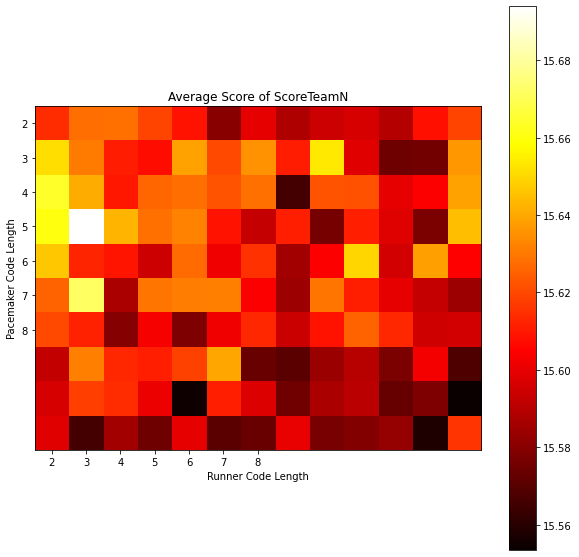

In [91]:
StratList = [cTFT,dTFT,TF2T,T2FT,GRIM,GRADUAL,softMAJ,hardMAJ,PROBER,GTFT,cWSLS,dWSLS,ALLC,ALLD,RANDOM,extort]

LenCodeSpace = range(2, 9)
repeat = 300
resultr2 = []

for lenCodeP_ in range(5, 15):
    resultP = []
    for lenCodeR_ in range(2, 15):
        TotalScore = 0
        t = time.perf_counter()
        for _ in range(repeat):
            R, P = ScoreTeamNc(lenCodeR=lenCodeR_, lenCodeP=lenCodeP_)
            TotalScore += Game(R, R, 200)[0] / 7
            for opponent in StratList + [P]:
                TotalScore += Game(R, opponent, 200)[0]
        avg = TotalScore/repeat
        resultP.append(avg)
        print(f'lenCodeP: {lenCodeP_}, lenCodeR: {lenCodeR_}, Average Score: {avg}, Time taken: {time.perf_counter() - t}')
    resultr2.append(resultP)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.imshow(resultr2, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(LenCodeSpace)), LenCodeSpace)
plt.yticks(range(len(LenCodeSpace)), LenCodeSpace)
plt.xlabel('Runner Code Length')
plt.ylabel('Pacemaker Code Length')
plt.title('Average Score of ScoreTeamN')
plt.show()